## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

# Reading the dataset from csv file

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('datasets/office_episodes.csv')

# Exploratory Data Analysis and Visualization

In [9]:
data.shape

(188, 14)

In [10]:
data.columns

Index(['episode_number', 'season', 'episode_title', 'description', 'ratings',
       'votes', 'viewership_mil', 'duration', 'release_date', 'guest_stars',
       'director', 'writers', 'has_guests', 'scaled_ratings'],
      dtype='object')

In [11]:
data.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
episode_number    188 non-null int64
season            188 non-null int64
episode_title     188 non-null object
description       188 non-null object
ratings           188 non-null float64
votes             188 non-null int64
viewership_mil    188 non-null float64
duration          188 non-null int64
release_date      188 non-null object
guest_stars       29 non-null object
director          188 non-null object
writers           188 non-null object
has_guests        188 non-null bool
scaled_ratings    188 non-null float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB


In [13]:
data.describe()

,episode_number,season,ratings,votes,viewership_mil,duration,scaled_ratings
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191,0.511636
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254,0.184353
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000,0.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000,0.375000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000,0.500000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000,0.625000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000,1.000000


In [14]:
data[['ratings','duration','viewership_mil']].describe()

,ratings,duration,viewership_mil
count,188.000000,188.000000,188.000000
mean,8.237234,27.053191,7.246330
std,0.589930,6.937254,2.066012
min,6.600000,19.000000,3.250000
25%,7.800000,22.000000,5.990000
50%,8.200000,23.000000,7.535000
75%,8.600000,30.000000,8.425000
max,9.800000,60.000000,22.910000


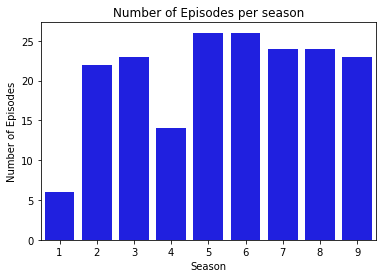

In [15]:
sns.countplot(x = 'season',data = data, color='blue')
plt.xlabel('Season')
plt.ylabel('Number of Episodes')
plt.title('Number of Episodes per season');

Text(0.5,0,'Season')

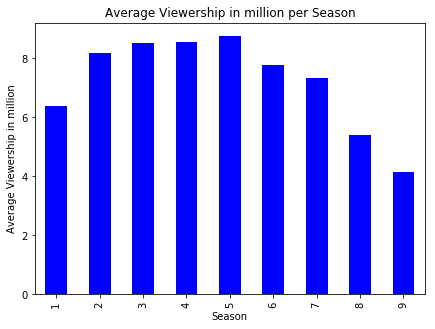

In [16]:
m=data.groupby('season')['viewership_mil'].mean()
m.plot(kind='bar',color='blue',title='Average Viewership in million per Season', figsize=(7,5))
plt.ylabel('Average Viewership in million')
plt.xlabel('Season')


Text(0.5,1,'Ten longest episodes of Office')

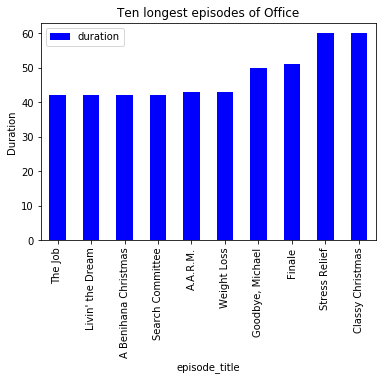

In [25]:
m=data.sort_values('duration').tail(10)
m.plot(x='episode_title',y='duration',kind='bar',color='blue')
plt.ylabel('Duration')
plt.title('Ten longest episodes of Office')

Text(0.5,1,'Ten most viewed episodes of the Office')

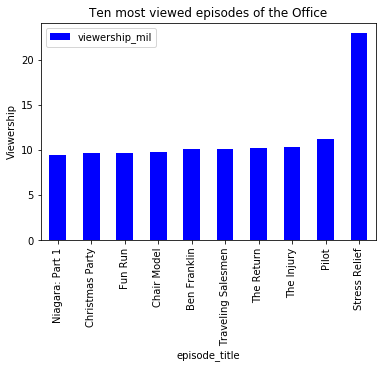

In [35]:
m=data.sort_values('viewership_mil').tail(10)
m.plot(x='episode_title',y='viewership_mil',kind='bar',color='blue')
plt.ylabel('Viewership')
plt.title('Ten most viewed episodes of the Office')

In [40]:
col=[]
for index, row in data.iterrows():
    if (row['scaled_ratings']<0.25):
        color='red'
    elif (row['scaled_ratings']<0.5):
        color='orange'
    elif (row['scaled_ratings']<0.75):
        color='lightgreen'
    else:
        color='darkgreen'
    col.append(color)
    
    


In [43]:
size=[]
for index, row in data.iterrows():
    if (row['has_guests']==True):
        sizee=250
    else:
        sizee=25
    size.append(sizee)

Text(0.5,1,'Popularity, Quality, and Guest Appearances on the Office')

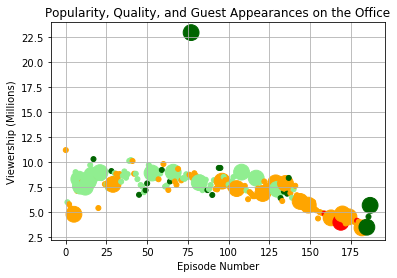

In [44]:
fig=plt.figure()
plt.scatter(x=data['episode_number'],y=data['viewership_mil'],s=size,c=col)
plt.grid()
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.title('Popularity, Quality, and Guest Appearances on the Office')

In [21]:
top_stars=data.loc[data.viewership_mil.idxmax(), 'guest_stars']

'Cloris Leachman, Jack Black, Jessica Alba'